In [1]:
from lisa.utils import *
from lisa.library import *
import lisa.models, pytz
import numpy as np, pandas as pd, datetime
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
import itertools

In [2]:
style.use('ggplot')
np.random.seed(42) 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.binary):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyed from a kernel by joparga3 https://www.kaggle.com/joparga3/kernels
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
dataset = DataSet.objects.get(id=7)
df = dataset.dataframe
print(df.shape)
df_res = pd.DataFrame(index=df.index, columns=df.columns)
df_mean = df.mean(axis=1)
df_std = df.std(axis=1)
df_quantile_25 = df.quantile(0.25, axis=1)
df_quantile_75 = df.quantile(0.75, axis=1)

(1000, 10)


In [4]:
count=0
for index, row in df.iterrows():
    for column in df.columns:
        IQR = df_quantile_75[index] - df_quantile_25[index]
        
        if row[column] < (df_quantile_25[index] - (1.5 * IQR)) or row[column] > (df_quantile_75[index] + (1.5 * IQR)):
            df_res.loc[index, column] = 1
            count+=1
            #print(index)
            #print('Val:', np.abs(row[column]))
            #print('Mean:', df_mean[index])
            #print('2 Std:', 2*df_std[index])
print(count)
print(df_res.sum(axis=0))

10
station
39    10.0
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
dtype: float64


In [5]:
indexes = []
for index, row in df_res.iterrows():
    for column in df_res.columns:
        if row[column] == 1:
            indexes.append(index)
            break
print(len(indexes))

10


In [6]:
df_class = pd.DataFrame(index=df.index)
df_class['Class'] = 0

for index in indexes:
    df_class.loc[index,'Class'] = 1
df = df.join(df_class)

In [7]:
# append mean values of each row to dataframe
df_val_mean = df_copy_with_mean(df.drop('Class', axis=1))

df_lisa_station_results = []
    
for station in dataset.stations.all():
    station_id = station.id
    print("station_id: {0}".format(station_id))

    df_correlation, time_elapsed = pearson(df.drop('Class', axis=1), station_id, window_size=16, min_periods=None)
    row_standardized = True
    if row_standardized:
        df_correlation = df_row_standardized(df_correlation)

    df_lisa_results, lisa_time_elapsed = df_lisa_time_series(station_id, df_val_mean, df_correlation)
    df_lisa_station_results.append(df_lisa_results)

df_lisa = pd.DataFrame(index=df.index)
for result in df_lisa_station_results:
    df_lisa = df_lisa.join(result)

station_id: 39
Execution time for pearson values for series: 0:00:00.063283
Execution time for lisa values: 0:00:01.584594
station_id: 40
Execution time for pearson values for series: 0:00:00.038792
Execution time for lisa values: 0:00:01.470320
station_id: 41
Execution time for pearson values for series: 0:00:00.035053
Execution time for lisa values: 0:00:01.468828
station_id: 42
Execution time for pearson values for series: 0:00:00.047792
Execution time for lisa values: 0:00:01.447204
station_id: 43
Execution time for pearson values for series: 0:00:00.041135
Execution time for lisa values: 0:00:01.515812
station_id: 44
Execution time for pearson values for series: 0:00:00.042304
Execution time for lisa values: 0:00:01.431755
station_id: 45
Execution time for pearson values for series: 0:00:00.034650
Execution time for lisa values: 0:00:01.495196
station_id: 46
Execution time for pearson values for series: 0:00:00.038800
Execution time for lisa values: 0:00:01.443441
station_id: 47
E

In [8]:
df_res = df_res.fillna(value=0)
print(len(df_res[39].values))
df_lisa = df_lisa.fillna(value=0)
y_pred_score = df_lisa[39].values
print(y_pred_score)

1000
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.         -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.99266728
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727 -0.27272727
 -0.27272727 -0.27272727 -0.27272727 -

In [10]:
tresholds = np.linspace(0, -1, 100)
scores = []
y_pred_score = df_lisa[39].values
for treshold in tresholds:
    y_hat = (y_pred_score < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=df_res[39].values),
                 precision_score(y_pred=y_hat, y_true=df_res[39].values),
                 fbeta_score(y_pred=y_hat, y_true=df_res[39].values, beta=1)])

scores = np.array(scores)

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


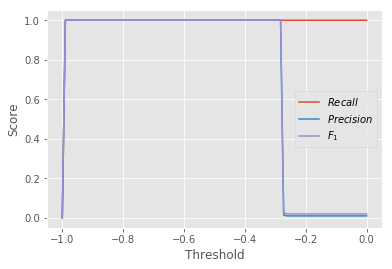

In [12]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_1$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -0.283
Recall Score: 1.000
Precision Score: 1.000
F1 Score: 1.000


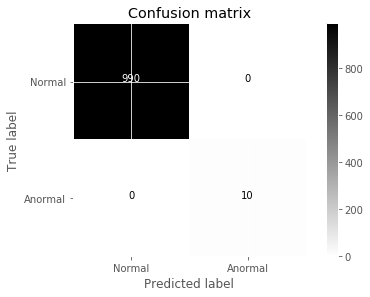

In [13]:
final_tresh = tresholds[scores[:, 2].argmax()]
#final_tresh = -0.4
y_hat_test = (df_lisa[39].values < final_tresh).astype(int)

print('Final threshold: %.3f' % final_tresh)
print('Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=df_res[39].values))
print('Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=df_res[39].values))
print('F1 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=df_res[39].values, beta=1))

cnf_matrix = confusion_matrix(df_res[39].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')

In [48]:
#gets all anormal instances
df[(model.predict(df_n.drop('Class', axis=1).values) < final_tresh)].shape

(623, 15)

Final threshold: 21
Test Recall Score: 0.468
Test Precision Score: 0.283
Test F1 Score: 0.353


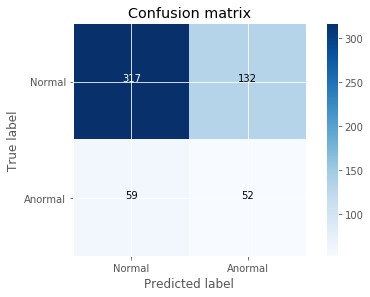

In [41]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.predict(test.drop('Class', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['Class'].values))
print('Test F1 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['Class'].values, beta=1))

cnf_matrix = confusion_matrix(test['Class'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'], title='Confusion matrix')